# Create a Dataset for Sentiment Analysis

### Import required packages

In [ ]:

import json

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from tqdm import tqdm
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

### List of apps that information need to be scraped

In [2]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]


In [4]:
# scrape the available  for each app
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.33it/s]


In [10]:
app_infos[1]

{'title': 'Todoist: To-Do List, Tasks & Reminders',
 'description': '🏆 <b>2019 Editor\'s Choice</b> by Google\r\n🥇 "<b>Todoist is the best to-do list app right now</b>" - The Verge\r\n\r\nTodoist is used by 25 million people to organize, plan and collaborate on projects, both big and small.\r\n\r\nUse Todoist to:\r\n• Capture and organize tasks the moment they pop into your head.\r\n• Remember deadlines with reminders and due dates. \r\n• Build lasting habits with recurring due dates like "every Monday".\r\n• Collaborate on projects by assigning tasks to others.\r\n• Prioritize your tasks with priority levels.\r\n• Track your progress with personalized productivity trends.\r\n• Integrate your tools like Gmail, Google Calendar, Slack, Amazon Alexa and more.\r\n\r\nAvailable on any device, Todoist will quickly become your hub for getting work and life organized.\r\n\r\nWhy you’ll love it on Android:\r\n• Stay organized from your phone, tablet and watch.\r\n• Drag the Plus Button anywhere

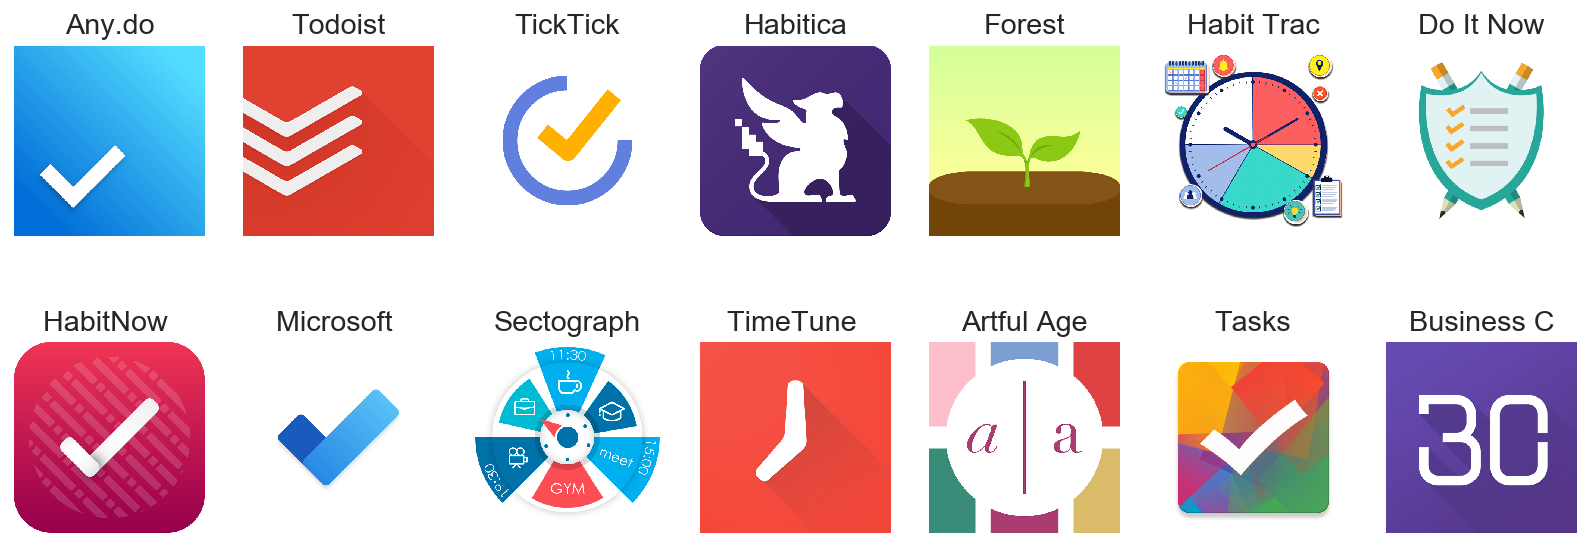

In [6]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')



In [11]:
app_infos_df = pd.DataFrame(app_infos)
# app_infos_df.to_csv('apps.csv', index=None, header=True)

In [13]:
app_infos_df.head(2)

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Any.do: To do list, Calendar, Planner & Reminders",<b>🏆 Editor's Choice by Google</b>\r\n\r\nAny....,<b>🏆 Editor&#39;s Choice by Google</b><br><br>...,Task Manager ✅ Organizer 📅 Agenda 📝 Daily Remi...,Task Manager ✅ Organizer 📅 Agenda 📝 Daily Remi...,"10,000,000+",10000000,4.384978,350098,124386,...,None,None,None,"Nov 10, 2011",1594309693,Varies with device,- New and stunning reminders design (upgraded ...,- New and stunning reminders design (upgraded ...,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2019 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2019 Editor&#39;s Choice</b> by Google<br...,"""The best to-do list"" — The Verge. Tasks ✅ Rem...",&quot;The best to-do list&quot; — The Verge. T...,"10,000,000+",10000000,4.562684,204279,62379,...,None,None,None,"Nov 18, 2012",1594829434,Varies with device,🐛 Pesky bugs exterminated. Things should be a ...,🐛 Pesky bugs exterminated. Things should be a ...,com.todoist,https://play.google.com/store/apps/details?id=...


In [50]:
# Scraping App Reviews
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews( ap,
                        lang='en',
                        country='us',
                        sort=sort_order,
                        count= 200 if score == 3 else 100,
                        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:47<00:00,  3.15s/it]


In [51]:
app_reviews[1]

{'reviewId': 'gp:AOqpTOGG5EdQ69VnyUoJ2bJ4jB_hWqNeLh9nZ-ULOVzV-ZWN0kzqlWbjoL3bbAm6T1NX-uCodpxo5BXUO5MuKA',
 'userName': 'Sergey P',
 'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GgVZCVhMVKuKQCcDSIhbey0DGpV13TXk1Z85uA69Xo',
 'content': 'Any.Forget... Had an instance of daily repeating event, that I have marked as complete today and somehow it did skip the next day and only proceeded to the day after. Kind of "daily event with some days skipped". So useless to me as can\'t be trusted for notifying about daily routine tasks. P.S. don\'t tell me I don\'t know how to setup a recurring event!!',
 'score': 1,
 'thumbsUpCount': 12,
 'reviewCreatedVersion': '5.2.0.9',
 'at': datetime.datetime(2020, 7, 8, 15, 7, 48),
 'replyContent': 'Our team will be happy to look into this issue for you, should you submit a bug report via your app Settings - Support. You may also contact us at - https://www.any.do/contact_form',
 'repliedAt': datetime.datetime(2020, 7, 9, 13, 49, 41),
 'sortOrder': '

In [52]:
len(app_reviews)

16054

In [53]:
len(app_reviews)

16054

In [54]:
app_reviews_df = pd.DataFrame(app_reviews)


In [55]:
app_reviews_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...,Mad Scientist,https://lh3.googleusercontent.com/-kIZF4kMt6yY...,"Unable to register with an email. Clicking""con...",1,76,5.2.0.9,2020-07-10 23:29:22,We are unaware of any issues with signing in t...,2020-07-12 13:32:19,most_relevant,com.anydo
1,gp:AOqpTOGG5EdQ69VnyUoJ2bJ4jB_hWqNeLh9nZ-ULOVz...,Sergey P,https://lh3.googleusercontent.com/a-/AOh14GgVZ...,Any.Forget... Had an instance of daily repeati...,1,12,5.2.0.9,2020-07-08 15:07:48,Our team will be happy to look into this issue...,2020-07-09 13:49:41,most_relevant,com.anydo


In [56]:
app_reviews_df['appId'].value_counts()

com.ticktick.task                1200
cc.forestapp                     1200
com.todoist                      1200
com.appxy.planner                1200
com.oristats.habitbull           1200
com.microsoft.todos              1200
com.appgenix.bizcal              1200
prox.lab.calclock                1200
com.anydo                        1200
com.tasks.android                1200
com.habitrpg.android.habitica    1200
com.gmail.jmartindev.timetune    1200
com.levor.liferpgtasks            798
com.habitnow                      610
com.artfulagenda.app              246
Name: appId, dtype: int64

In [57]:
app_reviews_df['appId'].value_counts()

com.ticktick.task                1200
cc.forestapp                     1200
com.todoist                      1200
com.appxy.planner                1200
com.oristats.habitbull           1200
com.microsoft.todos              1200
com.appgenix.bizcal              1200
prox.lab.calclock                1200
com.anydo                        1200
com.tasks.android                1200
com.habitrpg.android.habitica    1200
com.gmail.jmartindev.timetune    1200
com.levor.liferpgtasks            798
com.habitnow                      610
com.artfulagenda.app              246
Name: appId, dtype: int64

In [58]:
app_reviews_df.groupby(['appId', 'score']).agg({"score" : "count"})

score
appId                         score       
cc.forestapp                  1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.anydo                     1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.appgenix.bizcal           1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.appxy.planner             1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.artfulagenda.app          1         42
                              2         18
                              3         36
                              4         32
                              5        118
com.gmail.jmartindev.timetune 1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.habitnow                  1         66
                              2         30
                              3        114
                              4        200
                              5        200
com.habitrpg.android.habitica 1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.levor.liferpgtasks        1        118
                              2         90
                              3        190
                              4        200
                              5        200
com.microsoft.todos           1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.oristats.habitbull        1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.tasks.android             1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.ticktick.task             1        200
                              2        200
                              3        400
                              4        200
                              5        200
com.todoist                   1        200
                              2        200
                              3        400
                              4        200
                              5        200
prox.lab.calclock             1        200
                              2        200
                              3        400
                              4        200
                              5        200

In [61]:
app_reviews_df.groupby(['appId', 'sortOrder']).agg({"sortOrder" : "count"})

sortOrder
appId                         sortOrder               
cc.forestapp                  most_relevant        600
                              newest               600
com.anydo                     most_relevant        600
                              newest               600
com.appgenix.bizcal           most_relevant        600
                              newest               600
com.appxy.planner             most_relevant        600
                              newest               600
com.artfulagenda.app          most_relevant        123
                              newest               123
com.gmail.jmartindev.timetune most_relevant        600
                              newest               600
com.habitnow                  most_relevant        305
                              newest               305
com.habitrpg.android.habitica most_relevant        600
                              newest               600
com.levor.liferpgtasks        most_relevant        399
                              newest               399
com.microsoft.todos           most_relevant        600
                              newest               600
com.oristats.habitbull        most_relevant        600
                              newest               600
com.tasks.android             most_relevant        600
                              newest               600
com.ticktick.task             most_relevant        600
                              newest               600
com.todoist                   most_relevant        600
                              newest               600
prox.lab.calclock             most_relevant        600
                              newest               600

In [60]:
# write the scraped data of the apps to csv
app_reviews_df.to_csv('app_scraped_data.csv', index=None, header=True)